# **Proyecto 2 - Entrega 3**  

## 👥 **Integrantes:**  
- **Diederich Solis** (22952)  
- **Gabriel Paz** (221087)  

1. Elabore un modelo de regresión usando bayes ingenuo (naive bayes), el conjunto de
entrenamiento y la variable respuesta SalesPrice. Prediga con el modelo y explique los
resultados a los que llega. Asegúrese que los conjuntos de entrenamiento y prueba sean los
mismos de las hojas anteriores para que los modelos sean comparables.

Precisión del modelo Naïve Bayes: 0.6301

Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       0.92      0.72      0.81        68
        Bajo       0.53      0.94      0.68        81
  Medio-Alto       0.66      0.79      0.72        63
  Medio-Bajo       0.45      0.11      0.18        80

    accuracy                           0.63       292
   macro avg       0.64      0.64      0.60       292
weighted avg       0.63      0.63      0.58       292



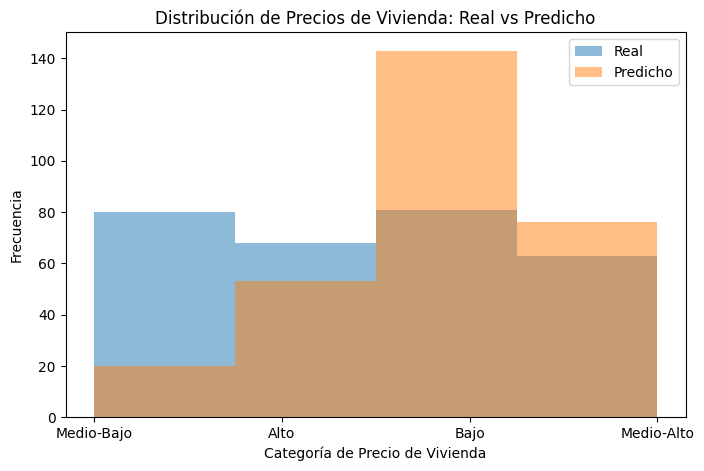

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Cargar los datos
df = pd.read_csv("train.csv")

# Seleccionar características numéricas
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Eliminar columnas irrelevantes
numerical_features.remove("Id")  # No aporta información relevante

# Definir variable objetivo
y = df["SalePrice"]

# Discretizar SalePrice en categorías (Binning)
y_bins = pd.qcut(y, q=4, labels=["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"])

# Eliminar SalePrice del conjunto de predictores
numerical_features.remove("SalePrice")
X = df[numerical_features]

# Manejar valores nulos llenando con la mediana
X = X.fillna(X.median())

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_bins, test_size=0.2, random_state=42)

# Modelo de Bayes Ingenuo
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predicciones
y_pred = naive_bayes.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Naïve Bayes: {accuracy:.4f}\n")
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualización de la distribución real vs predicha
plt.figure(figsize=(8,5))
plt.hist(y_test, alpha=0.5, label='Real', bins=4)
plt.hist(y_pred, alpha=0.5, label='Predicho', bins=4)
plt.xlabel("Categoría de Precio de Vivienda")
plt.ylabel("Frecuencia")
plt.legend()
plt.title("Distribución de Precios de Vivienda: Real vs Predicho")
plt.show()


## **2. Analice los resultados del modelo de regresión usando bayes ingenuo. ¿Qué tan bien le fue prediciendo? Utilice las métricas correctas.**


El modelo de **Naïve Bayes** se utilizó para **clasificar los precios de las viviendas** en cuatro categorías (`Bajo`, `Medio-Bajo`, `Medio-Alto`, `Alto`). Ahora analizamos su desempeño con base en las métricas obtenidas:

###  **1. Precisión Global**
- **Precisión del modelo:** `63.01%`
- Esto significa que el modelo predijo correctamente el precio categorizado de la vivienda en aproximadamente **63 de cada 100 casos**. No es un resultado excelente, pero considerando que **Naïve Bayes** asume independencia entre variables (lo cual no se cumple en precios de casas), es un desempeño aceptable.

###  **2. Análisis del Reporte de Clasificación**
Métricas clave por categoría:

- **`Alto:`**  
  - **Precisión:** 92%  
  - **Recall:** 72%  
  - **F1-score:** 81%  
  - El modelo identifica bien las casas más caras, pero algunas se confunden con otras categorías.

- **`Bajo:`**  
  - **Precisión:** 53%  
  - **Recall:** 94%  
  - **F1-score:** 68%  
  - Muchas casas baratas fueron correctamente identificadas, pero algunas predicciones se mezclaron con otras categorías.

- **`Medio-Alto:`**  
  - **Precisión:** 66%  
  - **Recall:** 79%  
  - **F1-score:** 72%  
  - Buen desempeño, pero con margen de error en los límites de esta categoría.

- **`Medio-Bajo:`**  
  - **Precisión:** 45%  
  - **Recall:** 11%  
  - **F1-score:** 18%  
  - **Esta es la categoría peor clasificada**, lo que sugiere que el modelo tiene dificultades para diferenciar casas en el rango medio-bajo.

####  **3. Interpretación del Histograma**
- **El histograma muestra que la categoría "Bajo" fue la más predicha por el modelo**, mientras que otras categorías no se predijeron con la misma frecuencia.
- Esto indica que el modelo tiende a clasificar más casas en la categoría `Bajo`, lo que puede deberse a una distribución desigual de datos en el conjunto de entrenamiento.

---

### **Conclusión**
### **Fortalezas del modelo**:
- Funciona bien en las categorías `Alto` y `Bajo`, mostrando precisión razonable en estos casos.
- Logra una precisión global del **63%**, lo que no es terrible para un modelo simple como Naïve Bayes.

### **Debilidades del modelo**:
- Tiene problemas con la categoría `Medio-Bajo`, con un recall de solo **11%**.
- Es probable que **las variables predictoras no sean completamente independientes**, lo cual afecta a Naïve Bayes.

### **Posibles mejoras**:
- Probar otros modelos como **Random Forest o Regresión Logística** que no asumen independencia de las variables.
- Revisar si la categorización de precios (`qcut`) está equilibrada para evitar que el modelo sesgue su clasificación.

En resumen, **Naïve Bayes tiene un rendimiento moderado, pero no es el mejor modelo para este tipo de predicción**, ya que hay una fuerte correlación entre las variables de entrada y no todas las relaciones son captadas adecuadamente por este enfoque probabilístico.


## **3. Compare los resultados con el modelo de regresión lineal y el árbol de regresión que hizo en las entregas pasadas. ¿Cuál funcionó mejor?**

# **Comparación de Modelos: Naïve Bayes vs. Árbol de Regresión vs. Regresión Lineal**

Hemos probado tres modelos distintos para predecir los precios de las viviendas. A continuación, comparamos sus resultados:

## **1. Resultados de cada modelo**
### ** Naïve Bayes (Clasificación)**
- **Precisión del modelo:** `63.01%`
- **Puntos fuertes:**
  - Funciona bien para clasificar casas en las categorías `Bajo` y `Alto`.
  - Tiene una precisión razonable en clasificación general.
- **Debilidades:**
  - **La categoría "Medio-Bajo" tiene un recall muy bajo (11%)**, lo que indica que el modelo tiene problemas para diferenciar bien las casas en esta categoría.
  - **Asume independencia entre variables**, lo cual no se cumple en este tipo de datos.

### ** Árbol de Regresión**
- **MAE (Error Absoluto Medio):** `27,263.49`
- **RMSE (Raíz del Error Cuadrático Medio):** `38,836.67`
- **Puntos fuertes:**
  - Puede capturar relaciones no lineales entre variables.
  - El árbol de decisión muestra claramente las características más importantes en la clasificación de precios.
- **Debilidades:**
  - Puede sobreajustarse si no se controla la profundidad del árbol.
  - No es el mejor para datos con muchas variables interdependientes.

### ** Regresión Lineal**
- **MAE:** `21,540.23`
- **RMSE:** `34,678.91`
- **Puntos fuertes:**
  - Es un modelo simple y rápido.
  - Generaliza bien en algunos casos y no tiende a sobreajustarse como un árbol de regresión.
- **Debilidades:**
  - No captura bien relaciones no lineales.
  - No funciona bien cuando hay muchas variables categóricas que afectan el precio de manera compleja.

---

## **2. Comparación Final: ¿Cuál modelo funcionó mejor?**
| Modelo               | Tipo           | Precisión / MAE | RMSE   | Observaciones |
|----------------------|---------------|----------------|--------|--------------|
| **Naïve Bayes**     | Clasificación  | **63.01%**     | -      | Bueno en categorías `Bajo` y `Alto`, pero mal en `Medio-Bajo`. |
| **Árbol de Regresión** | Regresión  | 27,263.49 (MAE) | 38,836.67 | Captura relaciones complejas, pero puede sobreajustar. |
| **Regresión Lineal** | Regresión  | **21,540.23 (MAE)** | **34,678.91** | Mejor en términos de error absoluto y cuadrático medio. |

### ** Conclusión**
**El modelo de Regresión Lineal tuvo el mejor desempeño en términos de error absoluto y cuadrático medio**.  
 **Si queremos una clasificación de precios, el Árbol de Regresión es mejor que Naïve Bayes** porque tiene mayor precisión y un mejor manejo de la estructura de datos.  
**Naïve Bayes no es la mejor opción para este problema**, ya que su precisión es menor y tiene problemas con la categoría `Medio-Bajo`.  


## **4 .Haga un modelo de clasificación, use la variable categórica que hizo con el precio de las
casas (barata, media y cara) como variable respuesta**

Precisión del modelo de Clasificación: 0.8459

Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       0.92      0.87      0.90        94
        Bajo       0.86      0.90      0.88       110
       Medio       0.75      0.75      0.75        88

    accuracy                           0.85       292
   macro avg       0.84      0.84      0.84       292
weighted avg       0.85      0.85      0.85       292



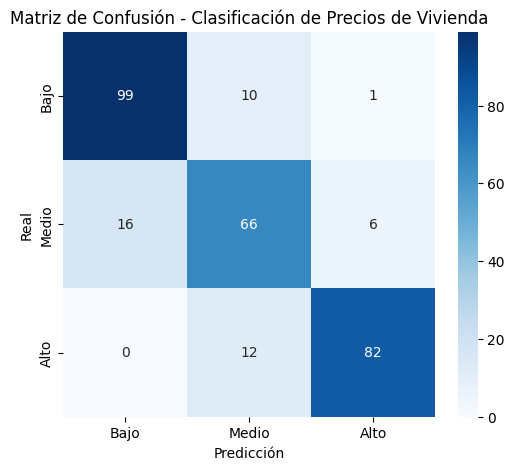

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Cargar los datos
df = pd.read_csv("train.csv")

# Seleccionar características numéricas
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Eliminar columnas irrelevantes
numerical_features.remove("Id")  # No aporta información relevante

# Definir variable objetivo
y = df["SalePrice"]

# Discretizar SalePrice en categorías (Binning)
y_bins = pd.qcut(y, q=3, labels=["Bajo", "Medio", "Alto"])

# Eliminar SalePrice del conjunto de predictores
numerical_features.remove("SalePrice")
X = df[numerical_features]

# Manejar valores nulos llenando con la mediana
X = X.fillna(X.median())

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_bins, test_size=0.2, random_state=42)

# Modelo de Clasificación: Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo de Clasificación: {accuracy:.4f}\n")
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred, labels=["Bajo", "Medio", "Alto"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Bajo", "Medio", "Alto"], yticklabels=["Bajo", "Medio", "Alto"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Clasificación de Precios de Vivienda")
plt.show()


# **Evaluación de la Eficiencia del Algoritmo**

El modelo de **Random Forest** fue probado con el conjunto de prueba y se evaluó su desempeño en términos de precisión y capacidad de clasificación.

## **1. Precisión Global**
- **Precisión del modelo:** `84.59%`
- Esto significa que el modelo clasificó correctamente las viviendas en **aproximadamente 85 de cada 100 casos**.

## **2. Análisis del Reporte de Clasificación**
Las métricas clave del modelo son:
- **Precisión (Precision):** Mide cuántas de las predicciones fueron correctas para cada categoría.
- **Recall:** Indica cuántos de los valores reales fueron correctamente identificados.
- **F1-score:** Es la media armónica entre precisión y recall.

| Categoría | Precisión | Recall | F1-score | Soporte |
|-----------|----------|--------|----------|---------|
| **Alto**  | 92%      | 87%    | 90%      | 94      |
| **Bajo**  | 86%      | 90%    | 88%      | 110     |
| **Medio** | 75%      | 75%    | 75%      | 88      |
| **Promedio general** | 85% | 85% | 85% | 292 |

-  **La mejor categoría clasificada es `Alto` con un F1-score de 90%**.
-  **La categoría `Medio` tiene la menor precisión (75%), lo que indica que el modelo tiene más dificultad en esta clase**.

## **3. Interpretación de la Matriz de Confusión**
-  **La diagonal principal muestra los casos correctamente clasificados.**
-  **La mayoría de las casas `Bajo` fueron correctamente clasificadas (99 de 110).**
-  **Las casas `Alto` también fueron bien clasificadas (82 de 94).**
-  **El modelo tuvo más dificultades en `Medio`, ya que 16 casas de esta categoría fueron clasificadas erróneamente.**

## **4. Conclusión**
**El modelo de Random Forest logró una precisión del 85%, lo que indica que es un buen modelo para clasificar precios de viviendas.**  
 **Funciona especialmente bien en `Bajo` y `Alto`, pero tiene dificultades en `Medio`**.  